In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [8]:
df = pd.read_excel('Data_Entry_Excel.xlsx')

c:\Users\barnabas.nemeth\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Clean empty rows

In [25]:
df.head()

,Match Type,Service Count,Team A,Team B,Serving Team,Successful Service,Point Winning Team,Length of the rally (s),Oszlop1
0,Men's Doubles,2.0,Ádám Bakó/ Ádám Blázsovics,Nikola Mitro/ Bogdan Marojevic,B,1,B,7.0,NaN
3,NaN,1.0,Vicsek/Gémesi,Péchy/Forgács,B,DF,A,0.0,NaN
4,Mixed Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,A,1,A,18.0,NaN
5,Men's Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,B,1,A,5.0,NaN
6,Mixed Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,A,DF,B,0.0,NaN


In [24]:
df.describe()

,Service Count,Length of the rally (s)
count,2090.000000,2029.000000
mean,1.530144,8.799409
std,0.499210,7.102148
min,1.000000,0.000000
25%,1.000000,4.000000
50%,2.000000,7.000000
75%,2.000000,12.000000
max,2.000000,50.000000


In [23]:
df = df[df['Serving Team'].notna() & df['Successful Service'].notna()]

LENGTH OF RALLIES ANALYSIS

In [28]:
df['Length of the rally (s)'].describe()

count    2029.000000
mean        8.799409
std         7.102148
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        50.000000
Name: Length of the rally (s), dtype: float64

In [80]:
df[df['Service Count']== 2].describe()

,Service Count,Length of the rally (s)
count,1108.0,1108.000000
mean,2.0,10.793321
std,0.0,7.701035
min,2.0,0.000000
25%,2.0,5.000000
50%,2.0,10.000000
75%,2.0,15.000000
max,2.0,50.000000


Text(0.5, 1.0, 'Labdamenetek hosszának gyakorisága 1, illetve 2 szerva esetén')

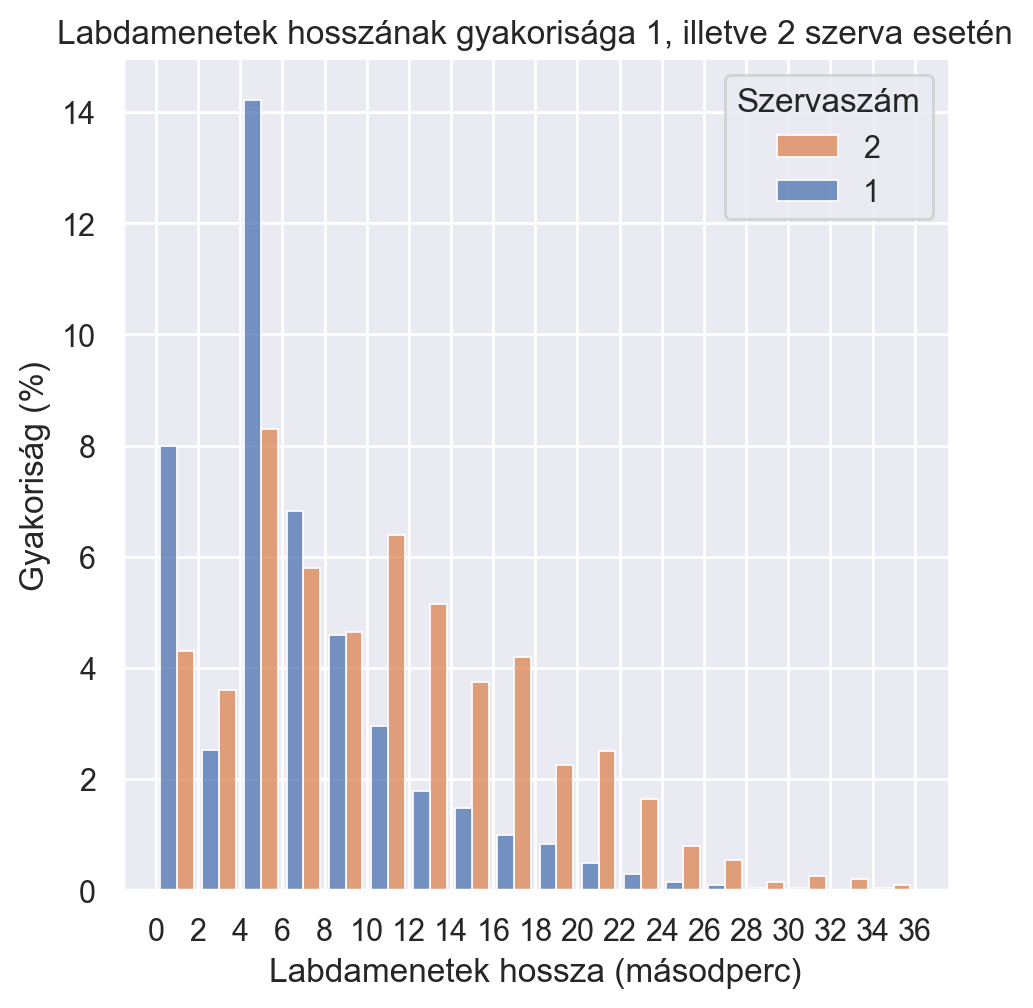

In [150]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})

ax = sns.displot(df, x="Length of the rally (s)", binwidth=2, hue='Service Count', palette=["C0", "C1",], stat = 'percent', multiple='dodge', legend = False, binrange=(0,35), shrink=.8)

ax.set(xlabel='Labdamenetek hossza (másodperc)', ylabel='Gyakoriság (%)')
plt.xticks([0, 2,4,6,8,10,12,14,16,18,20, 22,24,26,28,30,32,34,36])
plt.legend(title='Szervaszám', loc='upper right', labels=['2', '1'])
plt.title('Labdamenetek hosszának gyakorisága 1, illetve 2 szerva esetén')


NUMBER OF DOUBLE FAULTS

In [145]:
one_serivce_df_percentage = round(len(df[(df['Service Count'] == 1) & (df['Successful Service'] == 'DF')]) / len(df['Service Count'] == 1), 4)*100

In [147]:
two_service_df_percentage = round(len(df[(df['Service Count'] == 2) & (df['Successful Service'] == 'DF')]) / len(df['Service Count'] == 1), 4)*100

In [326]:
df_double_faults = df.copy()

In [327]:
df_double_faults['Length of the rally (s)'] = np.where(df_double_faults['Successful Service'] == 'DF', -2 , df_double_faults['Length of the rally (s)'])

In [328]:
df_double_faults

,Match Type,Service Count,Team A,Team B,Serving Team,Successful Service,Point Winning Team,Length of the rally (s),Oszlop1
0,Men's Doubles,2.0,Ádám Bakó/ Ádám Blázsovics,Nikola Mitro/ Bogdan Marojevic,B,1,B,7.0,NaN
3,NaN,1.0,Vicsek/Gémesi,Péchy/Forgács,B,DF,A,-2.0,NaN
4,Mixed Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,A,1,A,18.0,NaN
5,Men's Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,B,1,A,5.0,NaN
6,Mixed Doubles,1.0,Forgács/Péchy,Gémesi/Vicsek,A,DF,B,-2.0,NaN
...,...,...,...,...,...,...,...,...,...
2114,Mixed Doubles,1.0,Gondos/Péchy,Keresztury/Vicsek,B,1,A,4.0,NaN
2115,Mixed Doubles,1.0,Gondos/Péchy,Keresztury/Vicsek,B,1,A,12.0,NaN
2116,Mixed Doubles,1.0,Gondos/Péchy,Keresztury/Vicsek,B,1,A,4.0,NaN
2117,Mixed Doubles,1.0,Gondos/Péchy,Keresztury/Vicsek,A,1,B,14.0,NaN


Text(0.5, 1.0, 'Labdamenetek hosszának gyakorisága 1, illetve 2 szerva esetén')

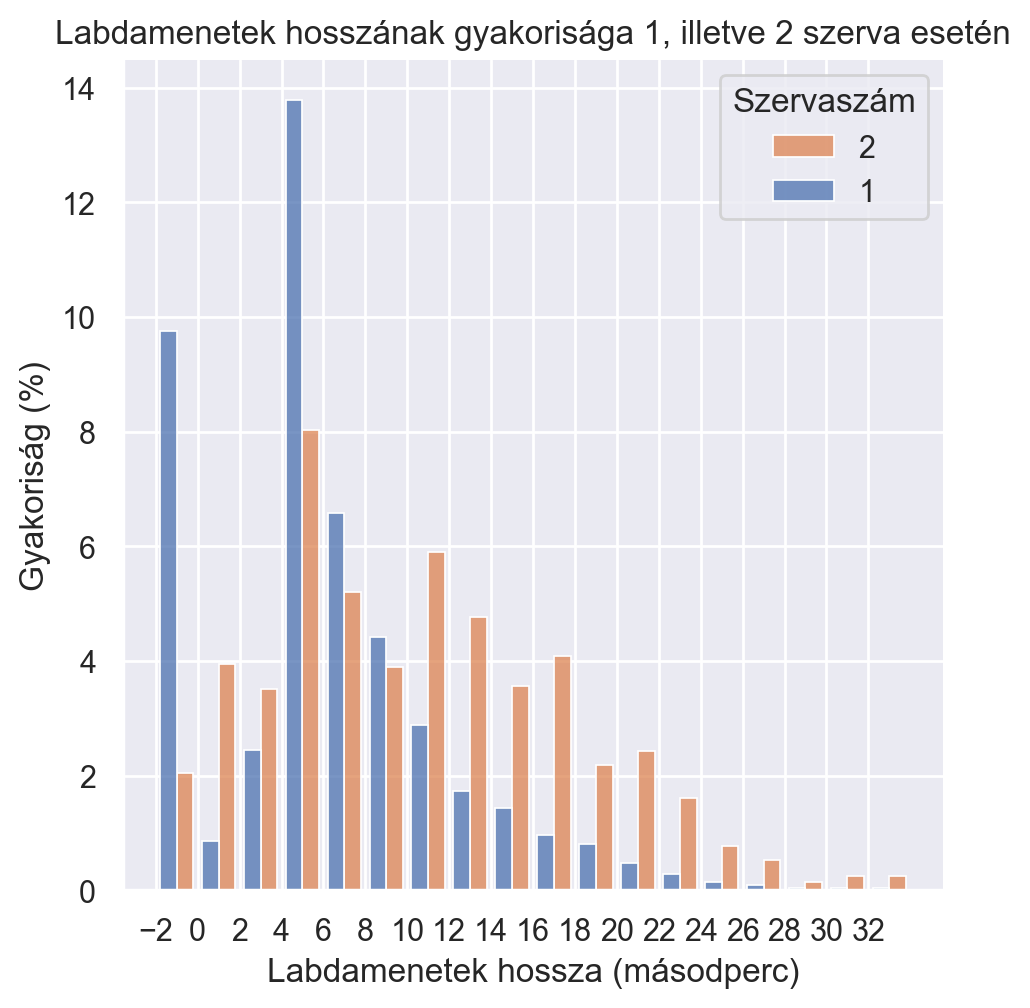

In [329]:
ax = sns.displot(df_double_faults, x="Length of the rally (s)", binwidth=2, binrange = (-2, 34), hue='Service Count', palette=["C0", "C1",], stat = 'percent', multiple='dodge', legend = False,  shrink=.8)

ax.set(xlabel='Labdamenetek hossza (másodperc)', ylabel='Gyakoriság (%)')

labels = list(range(-2,33, 2))
plt.xticks(labels)

plt.legend(title='Szervaszám', loc='upper right', labels=['2', '1'])
plt.title('Labdamenetek hosszának gyakorisága 1, illetve 2 szerva esetén')

